<a href="https://colab.research.google.com/github/seungmin-son/ML_Practice/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EB%A1%A0_6%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#필요한 라이브러리 선언

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import scatterplotmatrix

In [67]:
df = pd.read_csv('/content/Covid_data.csv')

# EDA

In [68]:
df.shape

(2000, 16)

In [69]:
df.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,Class
0,1,0,1,65,0,0,0,0,0,1,0,0,0,0,0,1
1,0,1,0,55,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,68,0,1,0,0,0,1,0,0,0,0,0,1
3,1,1,1,40,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,64,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   SEX             2000 non-null   int64
 1   PATIENT_TYPE    2000 non-null   int64
 2   PNEUMONIA       2000 non-null   int64
 3   AGE             2000 non-null   int64
 4   PREGNANT        2000 non-null   int64
 5   DIABETES        2000 non-null   int64
 6   COPD            2000 non-null   int64
 7   ASTHMA          2000 non-null   int64
 8   INMSUPR         2000 non-null   int64
 9   HIPERTENSION    2000 non-null   int64
 10  OTHER_DISEASE   2000 non-null   int64
 11  CARDIOVASCULAR  2000 non-null   int64
 12  OBESITY         2000 non-null   int64
 13  RENAL_CHRONIC   2000 non-null   int64
 14  TOBACCO         2000 non-null   int64
 15  Class           2000 non-null   int64
dtypes: int64(16)
memory usage: 250.1 KB


In [71]:
df.describe()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,Class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.398500,0.691000,0.645000,54.654500,0.004000,0.291500,0.026000,0.029500,0.02250,0.34400,0.032000,0.049000,0.222000,0.050500,0.069500,0.597000
std,0.489712,0.462197,0.478633,16.891027,0.063135,0.454567,0.159175,0.169246,0.14834,0.47516,0.176044,0.215922,0.415695,0.219029,0.254366,0.490623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,67.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,103.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
# 결측치 확인
df.isnull().sum()

SEX               0
PATIENT_TYPE      0
PNEUMONIA         0
AGE               0
PREGNANT          0
DIABETES          0
COPD              0
ASTHMA            0
INMSUPR           0
HIPERTENSION      0
OTHER_DISEASE     0
CARDIOVASCULAR    0
OBESITY           0
RENAL_CHRONIC     0
TOBACCO           0
Class             0
dtype: int64

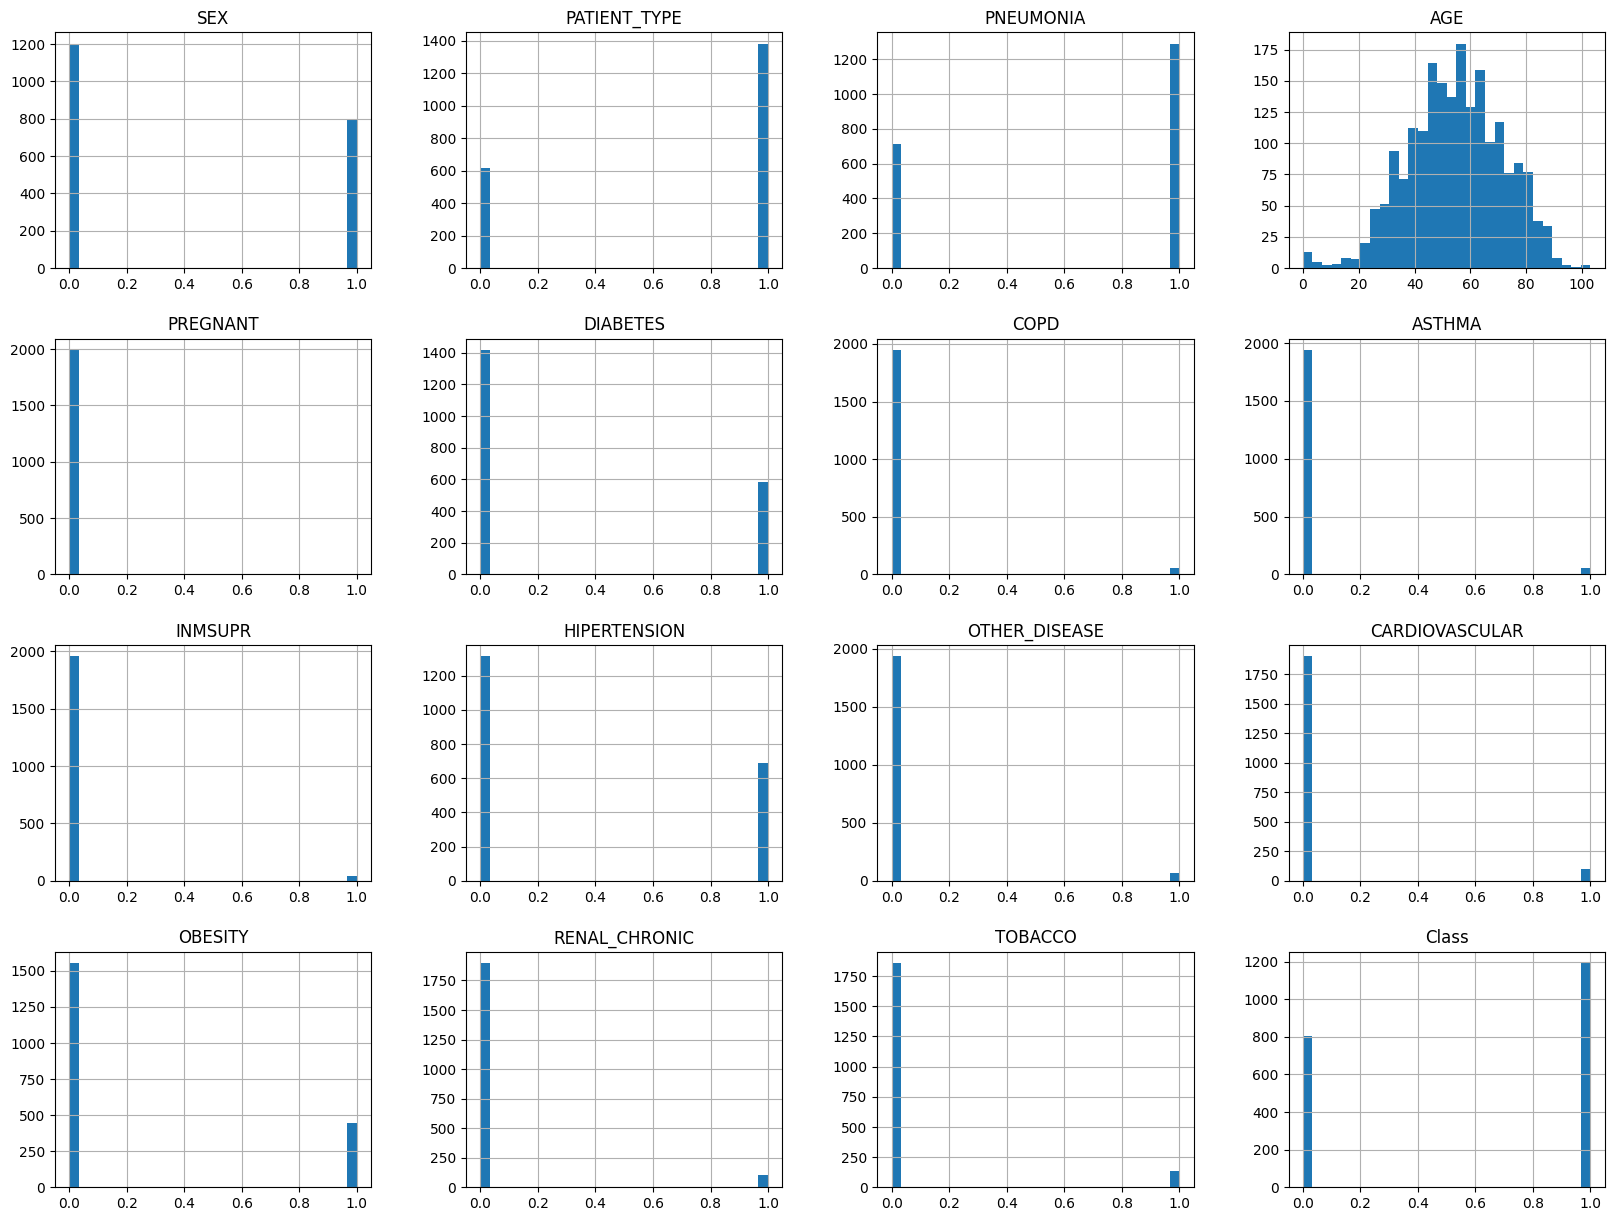

In [73]:
df.hist(bins=30, figsize=(20,15))
plt.show()

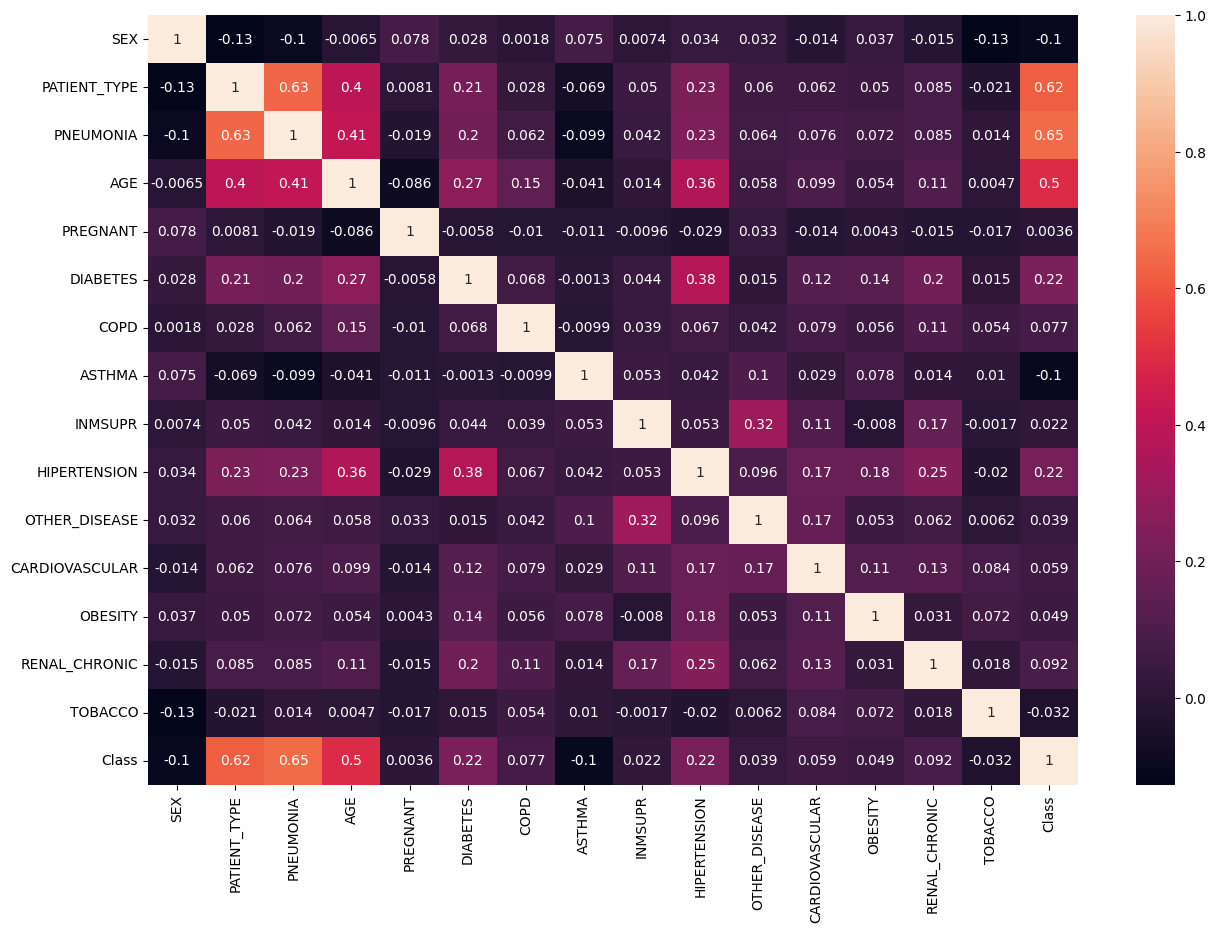

In [74]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

-> Class와 상관관계가 높은 feature은 PATIENT_TYPE ,PNEUMONIA , AGE  정도로 파악됨

-> PATIENT_TYPE 하고 PNEUMONIA feature끼리도 상관관계가 높으므로 둘 중에 하나만 사용해도 무방해보임

-> 그러나 다른 FEATURE들의 상관관계가 너무 낮아서 일단 사용 고려


# 데이터 전처리

###feature와 class 분리

In [75]:
X = df.drop(['Class'], axis=1)
y = df['Class']

X.shape, y.shape

((2000, 15), (2000,))

### 스케일링

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  ## 스케일링된 Feature DataFrame으로 변환

### 데이터 분리

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y,
                                                    test_size=0.2,
                                                    random_state=20)

# 모델 학습 (결정트리)

In [78]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score


tree = DecisionTreeClassifier(random_state=20)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)


print("결정트리 분류기 정확도: ", accuracy_score(y_test, tree_pred))

결정트리 분류기 정확도:  0.7525


### 중요 특성 확인

In [79]:
importances =  tree.feature_importances_
importance_series = pd.Series(importances, index=X.columns)

sorted_importances = importance_series.sort_values(ascending=False) #중요한 특성순으로 정렬
print(sorted_importances)

PNEUMONIA         0.477322
AGE               0.230778
PATIENT_TYPE      0.098619
SEX               0.042100
OBESITY           0.035149
HIPERTENSION      0.028975
DIABETES          0.027898
TOBACCO           0.013064
OTHER_DISEASE     0.013045
RENAL_CHRONIC     0.011128
CARDIOVASCULAR    0.008440
INMSUPR           0.005054
ASTHMA            0.004654
PREGNANT          0.002336
COPD              0.001438
dtype: float64


In [80]:
selected_features = ['PNEUMONIA', 'AGE', 'PATIENT_TYPE'] #상위 3개의 특성만 선택

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

tree2 = DecisionTreeClassifier(random_state=20)
tree2.fit(X_train_selected, y_train)

tree_pred2 = tree2.predict(X_test_selected)

print("결정나무 분류기 정확도: ", accuracy_score(y_test, tree_pred2))

결정나무 분류기 정확도:  0.8075


# 결정트리 하이퍼파라미터 튜닝 & 모델 성능 확인

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 21)
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=20), param_grid)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

grid_search.fit(X_train_selected, y_train)

print("최적 파라미터: ", grid_search.best_params_)
print("최고 점수: ", grid_search.best_score_)

best_dt = grid_search.best_estimator_

tree_pred3 = best_dt.predict(X_test_selected)

print("결정나무 분류기 정확도: ", accuracy_score(y_test, tree_pred3))

최적 파라미터:  {'max_depth': 4}
최고 점수:  0.843125
결정나무 분류기 정확도:  0.81


# 그래프 시각화

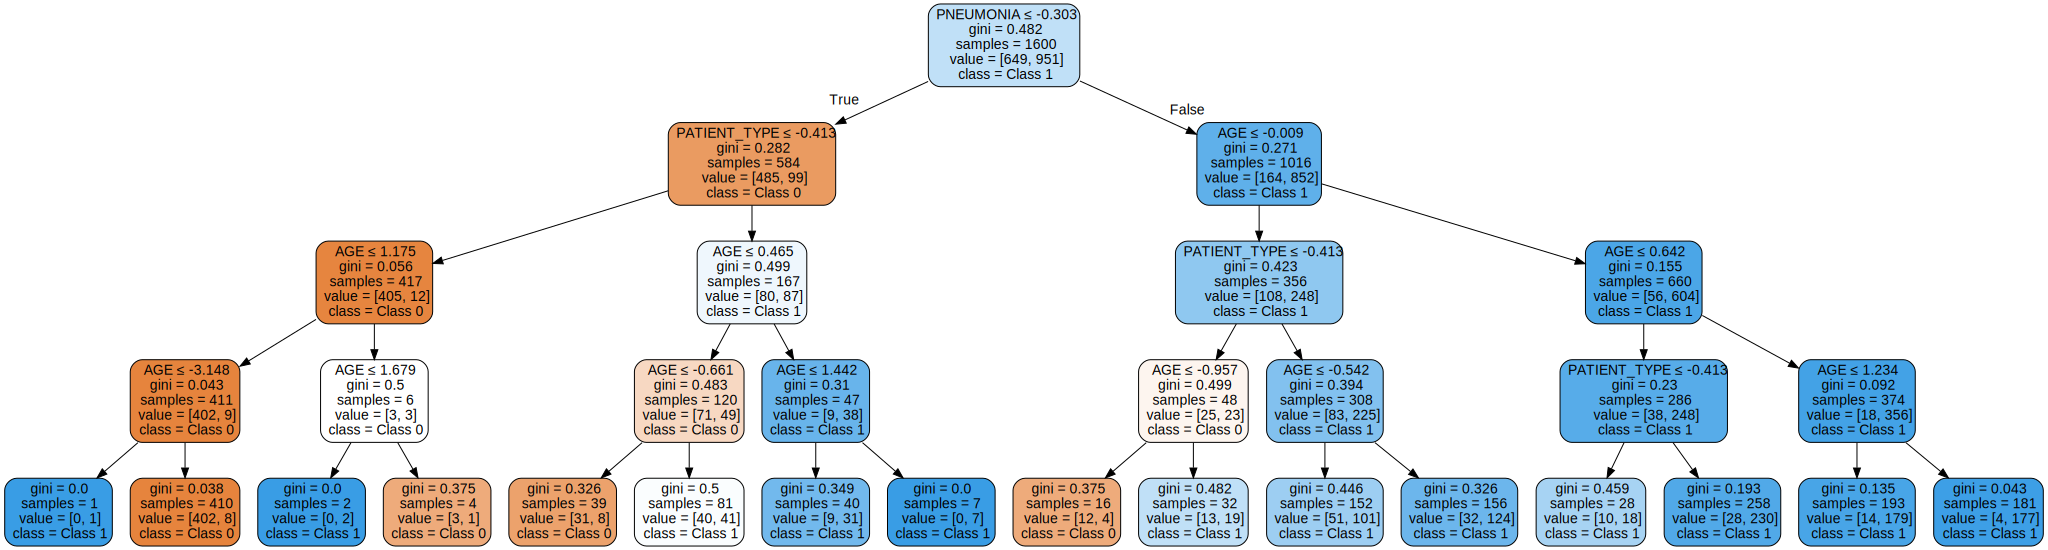

In [82]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(best_dt, out_file=None,
                           feature_names=selected_features,
                           class_names=['Class 0', 'Class 1'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view()

graph

In [83]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, tree_pred3)
print(cm)

[[ 86  71]
 [  5 238]]


# 모델 학습( 로지스틱 회귀)

In [84]:
# 결정트리에서 뽑은 상위 3개의 특성을 그대로 사용
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

logreg.fit(X_train_selected, y_train)

predictions = logreg.predict(X_test_selected)

print("로지스틱 회귀 정확도: ", accuracy_score(y_test, predictions))

로지스틱 회귀 정확도:  0.8375


# 하이퍼 파라미터 튜닝

In [85]:
param_grid = {'C': [0.005,0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(logreg, param_grid)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

grid_search.fit(X_train_selected, y_train)

print("최적의 C 값: ", grid_search.best_params_)

best_lr = grid_search.best_estimator_

predictions2 = best_lr.predict(X_test_selected)
print("로지스틱 회귀 정확도: ", accuracy_score(y_test, predictions2))

최적의 C 값:  {'C': 0.01}
로지스틱 회귀 정확도:  0.8425


# 모델 성능 확인

In [86]:
cm = confusion_matrix(y_test, predictions2)
cm

array([[105,  52],
       [ 11, 232]])